In [2]:
# TODO: Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
import seaborn as sns
from sklearn.decomposition import PCA
from skimage import data
from skimage import filters
from sklearn.preprocessing import StandardScaler

[0 1 2 ... 8 9 8]


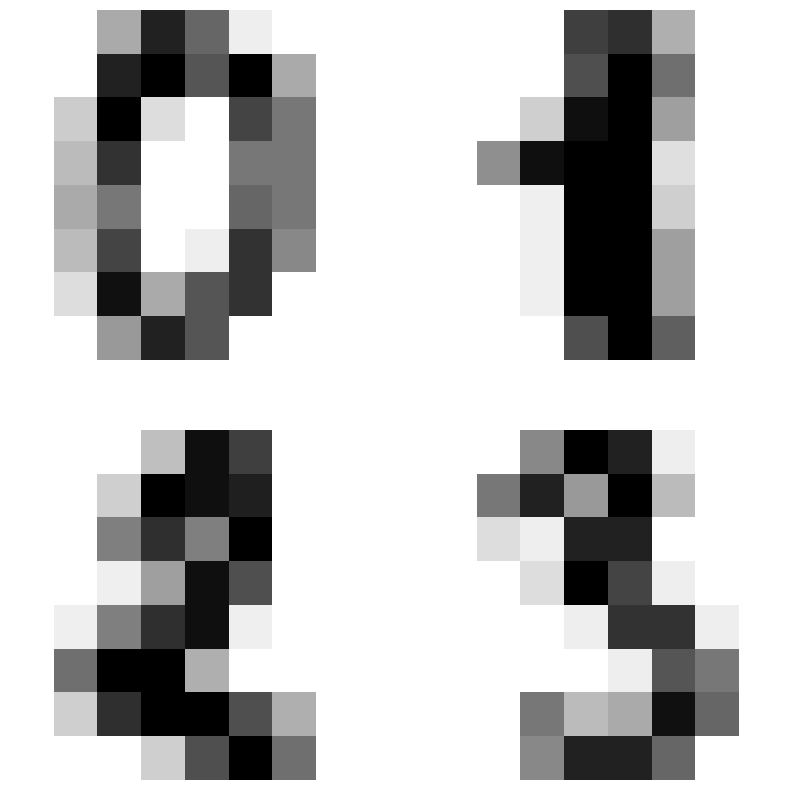

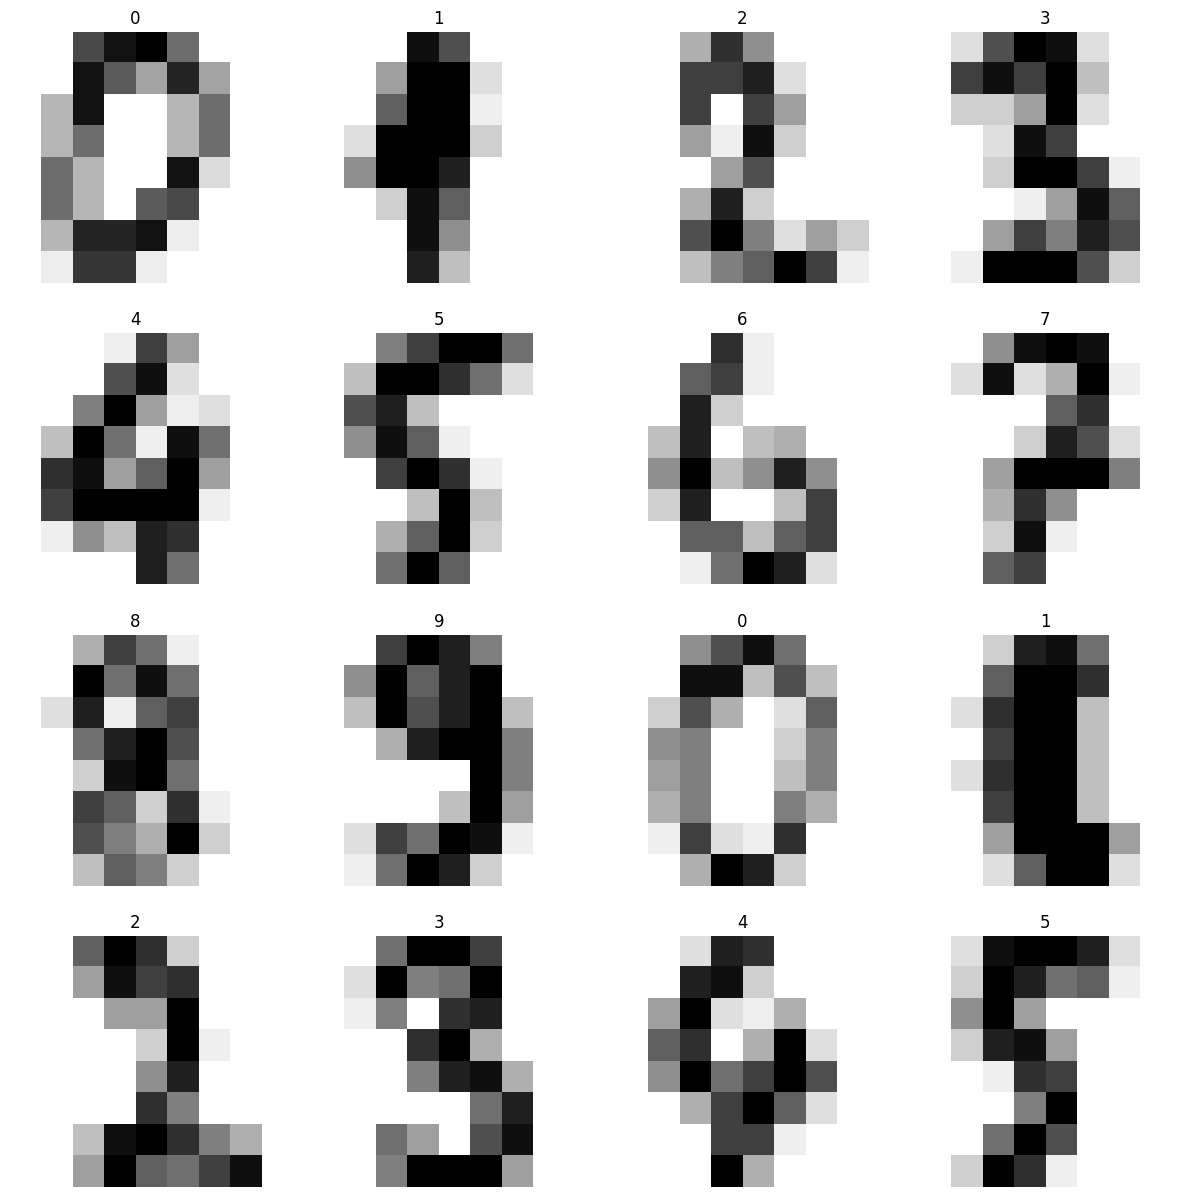

In [3]:
##########################################
## Data loading and first visualisation
##########################################

# Load the handwritten digits dataset
digits = load_digits() 
print(digits.target)
# Visualize some images
# TODO: Graph the first 4 images from the data base 

fig = plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(digits.images[i], cmap="binary")
    plt.axis('off')
plt.show()


# Display at least one random sample par class (some repetitions of class... oh well)
def plot_multi(data, y):
    '''Plots 16 digits'''
    nplots = 16
    nb_classes = len(np.unique(y))
    cur_class = 0
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        to_display_idx = np.random.choice(np.where(y == cur_class)[0])
        plt.imshow(data[to_display_idx].reshape((8,8)), cmap='binary')
        plt.title(cur_class)
        plt.axis('off')
        cur_class = (cur_class + 1) % nb_classes
    plt.show()


plot_multi(digits.data, digits.target)

classes : [0 1 2 3 4 5 6 7 8 9], number of elements per classes : [178 182 177 183 181 182 181 179 174 180]


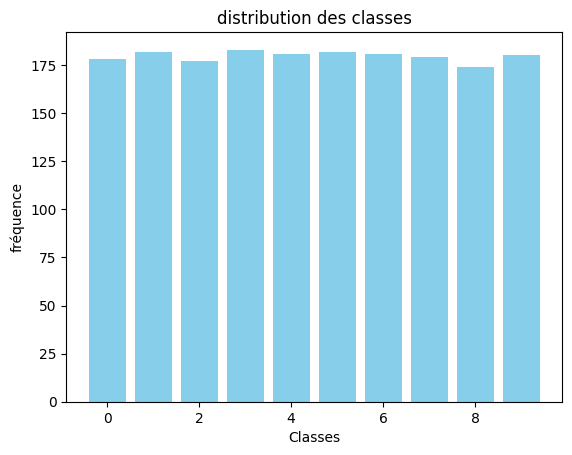

In [4]:
##########################################
## Data exploration and first analysis
##########################################

def get_statistics_text(targets):
    # TODO: Write your code here, returning at least the following useful infos:
    # * Label names
    # * Number of elements per class
    return np.unique(targets, return_counts=True)
    
    


# TODO: Call the previous function and generate graphs and prints for exploring and visualising the database
classes, counts = get_statistics_text(digits.target)
print(f"classes : {classes}, number of elements per classes : {counts}")
plt.bar(classes,counts,color='skyblue')
plt.xlabel('Classes')
plt.ylabel("fréquence")
plt.title("distribution des classes")
plt.show()

In [5]:
##########################################
## Start data preprocessing
##########################################

# Access the whole dataset as a matrix where each row is an individual (an image in our case) 
# and each column is a feature (a pixel intensity in our case)
## X = [
#  [Pixel1, Pixel2, ..., Pixel64],  # Image 1 as a row
#  [Pixel1, Pixel2, ..., Pixel64],  # Image 2 as a row
#  [Pixel1, Pixel2, ..., Pixel64],  # Image 3 as a row
#  [Pixel1, Pixel2, ..., Pixel64]   # Image 4 as a row
#]

# TODO: Create a feature matrix and a vector of labels
X = digits.data # load_digits(return_X_y=True)[0]
y = digits.target # load_digits(return_X_y=True)[1]

# Print dataset shape
print(f"Feature matrix shape: {X.shape}. Max value = {np.max(X)}, Min value = {np.min(X)}, Mean value = {np.mean(X)}")
print(f"Labels shape: {y.shape}")


# TODO: Normalize pixel values to range [0,1]

F = X/16  # Feature matrix after scaling

# Print matrix shape
print(f"Feature matrix F shape: {F.shape}. Max value = {np.max(F)}, Min value = {np.min(F)}, Mean value = {np.mean(F)}")


Feature matrix shape: (1797, 64). Max value = 16.0, Min value = 0.0, Mean value = 4.884164579855314
Labels shape: (1797,)
Feature matrix F shape: (1797, 64). Max value = 1.0, Min value = 0.0, Mean value = 0.30526028624095713


(64,)
x_pca : 
 [[-0.07871665 -1.32968022  0.59144091 -0.81338679  0.44555142  0.46504117
  -0.20330232 -0.1595919   0.03636513 -0.22660606 -0.1616223   0.09697544
  -0.05340604 -0.20867183 -0.36916185 -0.17147459 -0.02623981 -0.05613436
   0.04391318  0.21638242  0.1675531   0.06309059  0.12560642  0.08095717
   0.07367992]]
(1, 25)


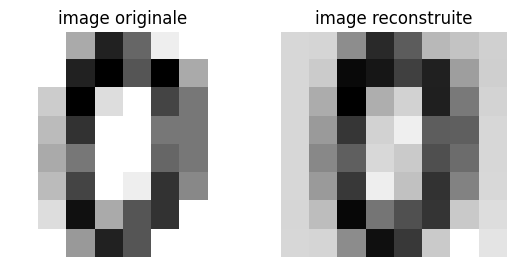

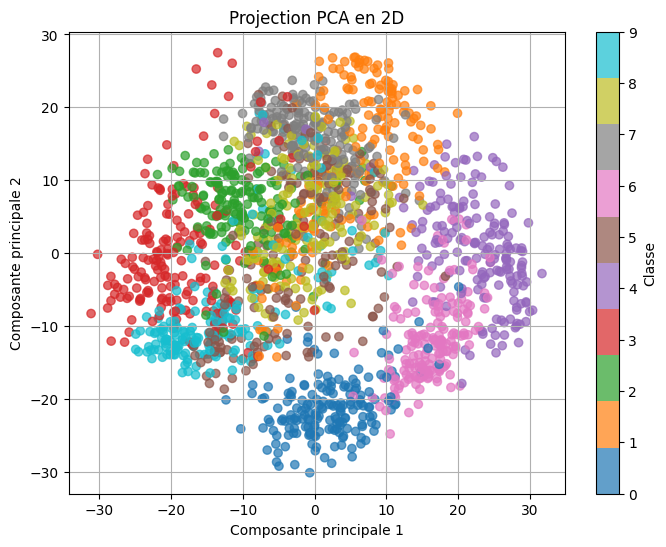

In [6]:
##########################################
## Dimensionality reduction
##########################################


### just an example to test, for various number of PCs
sample_index = 0
original_image = F[sample_index].reshape(8, 8)  # Reshape back to 8×8 for visualization

# TODO: Using the specific sample above, iterate the following:
# * Generate a PCA model with a certain value of principal components
# * Compute the approximation of the sample with this PCA model
# * Reconstruct a 64 dimensional vector from the reduced dimensional PCA space
# * Reshape the resulting approximation as an 8x8 matrix
# * Quantify the error in the approximation
# Finally: plot the original image and the 15 approximation on a 4x4 subfigure
# Assuming X is the original data matrix
print(F[sample_index].shape)
pca = PCA(n_components=25)
pca.fit(F)

X_pca = pca.transform(F[sample_index].reshape(1,-1)) # projection sur la base
print("x_pca : \n",X_pca)
print(X_pca.shape)


X_inv = pca.inverse_transform(X_pca)  # Reprojection dans l’espace initial 
reconstructed_image = X_inv.reshape(8, 8)

plt.subplot(1,2,1)
plt.imshow(original_image, cmap='binary')
plt.title("image originale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(reconstructed_image, cmap='binary')
plt.title("image reconstruite")
plt.axis("off")
plt.show()

### visualition en 2D après PCA à faire

# Appliquer PCA pour réduire à 2 dimensions
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)  # ou X_train si tu veux séparer les sets

# Affichage des points projetés
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Projection PCA en 2D")
plt.colorbar(scatter, ticks=range(10), label="Classe")
plt.grid(True)
plt.show()

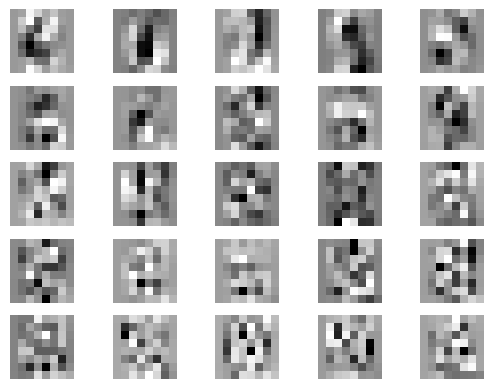

In [7]:
####x
matrice_passage = pca.components_

for i in range(25):
    plt.subplot(5,5,i+1)
    matrice = matrice_passage[i,:].reshape(8,8)
    plt.imshow(matrice,cmap="binary")
    plt.axis("off")
plt.show()

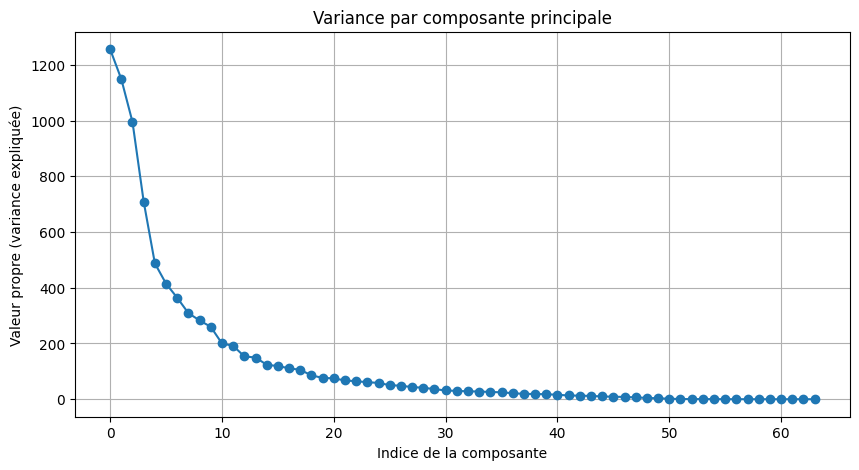

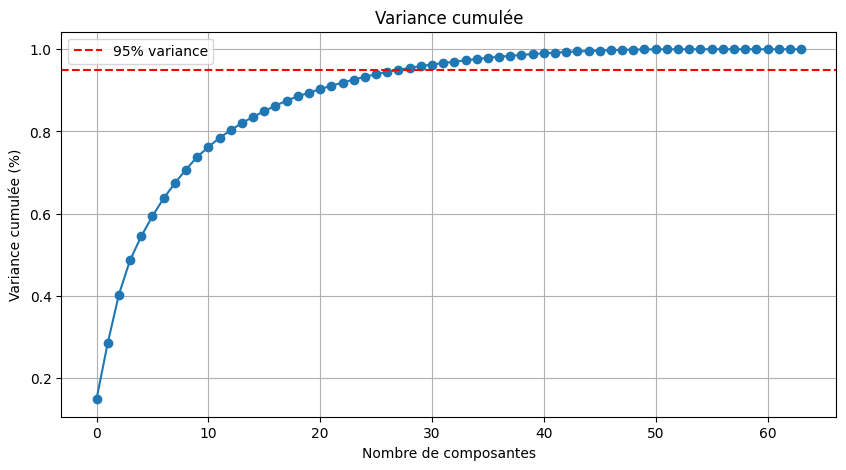

In [8]:
#### TODO: Expolore the explanined variance of PCA and plot 

# Create the visualization plot
X_centered = F - np.mean(F, axis=0)
cov_matrix = np.transpose(X_centered) @ X_centered # : matrice de corrélation
# Décomposition en valeurs propres
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
# Trier les valeurs/vecteurs propres par ordre décroissant
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
# Create the visualization plot
# Affichage des valeurs propres
plt.figure(figsize=(10,5))
plt.plot(eigenvalues, marker='o')
plt.title("Variance par composante principale")
plt.xlabel("Indice de la composante")
plt.ylabel("Valeur propre (variance expliquée)")
plt.grid(True)
plt.show()
# Affichage de la variance cumulée
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
plt.figure(figsize=(10,5))
plt.plot(cumulative_variance, marker='o')
plt.title("Variance cumulée")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance cumulée (%)")
plt.grid(True)
plt.axhline(0.95, color='red', linestyle='--', label='95% variance')
plt.legend()
plt.show()


In [9]:
### TODO: Display the whole database in 2D: 
database = []
for i in range(F.shape[0]):
    database.append(F[i].reshape(8,8))
    
print(database[0])

[[0.     0.     0.3125 0.8125 0.5625 0.0625 0.     0.    ]
 [0.     0.     0.8125 0.9375 0.625  0.9375 0.3125 0.    ]
 [0.     0.1875 0.9375 0.125  0.     0.6875 0.5    0.    ]
 [0.     0.25   0.75   0.     0.     0.5    0.5    0.    ]
 [0.     0.3125 0.5    0.     0.     0.5625 0.5    0.    ]
 [0.     0.25   0.6875 0.     0.0625 0.75   0.4375 0.    ]
 [0.     0.125  0.875  0.3125 0.625  0.75   0.     0.    ]
 [0.     0.     0.375  0.8125 0.625  0.     0.     0.    ]]


In [10]:
### TODO: Create a 20 dimensional PCA-based feature matrix

pca_20 = PCA(n_components=20)
pca_20.fit(F)
F_pca = pca_20.transform(F)

# Print reduced feature matrix shape
print(f"Feature matrix F_pca shape: {F_pca.shape}")

Feature matrix F_pca shape: (1797, 20)


In [11]:
##########################################
## Feature engineering
##########################################
### # Function to extract zone-based features
###  Zone-Based Partitioning is a feature extraction method
### that helps break down an image into smaller meaningful regions to analyze specific patterns.
def extract_zone_features(images):
    '''Break down an 8x8 image in 3 zones: row 1-3, 4-5, and 6-8'''
    zone_features = []
    for img in images:
        img_reshaped = img.reshape(8, 8)
        zone1 = np.mean(img_reshaped[0:4, :])  # lignes 0 à 2
        zone2 = np.mean(img_reshaped[4:6, :])  # lignes 3 à 4
        zone3 = np.mean(img_reshaped[6:9, :])  # lignes 5 à 7
        zone_features.append([zone1, zone2, zone3])
    return np.array(zone_features)

# Apply zone-based feature extraction
F_zones = extract_zone_features(F)

# Print extracted feature shape
print(f"Feature matrix F_zones shape: {F_zones.shape}")


Feature matrix F_zones shape: (1797, 3)


In [12]:
### Edge detection features

## TODO: Get used to the Sobel filter by applying it to an image and displaying both the original image 
# and the result of applying the Sobel filter side by side
# TODO: Compute the average edge intensity for each image and return it as an n by 1 arra
edges = []
for img in F:
    edges.append(np.mean(filters.sobel(img)))
F_edges = np.array(edges)
F_edges = F_edges.reshape(-1, 1) 

# Print feature shape after edge extraction
print(f"Feature matrix F_edges shape: {F_edges.shape}")


Feature matrix F_edges shape: (1797, 1)


In [13]:
### connect all the features together

# TODO: Concatenate PCA, zone-based, and edge features
F_final = np.concatenate((F_pca,F_zones,F_edges),axis=1)

# TODO: Normalize final features
s = StandardScaler()
F_final = s.fit_transform(F_final)


# Print final feature matrix shape
print(f"Final feature matrix F_final shape: {F_final.shape}")

Final feature matrix F_final shape: (1797, 24)


x_pca : 
 [[-0.39333858 -0.41014159  0.04011769 -0.07487241  0.22234778 -0.02224359
  -0.19757625 -0.09575141 -0.09147558 -0.12761321 -0.02101551 -0.11874304
  -0.05485998 -0.00703944 -0.1024791 ]]
(1, 15)


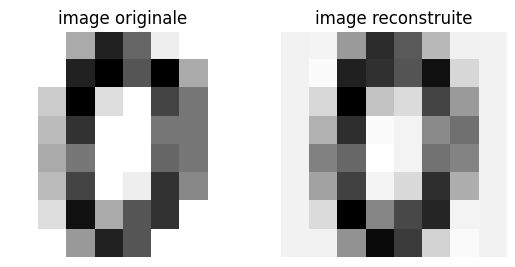

In [14]:
###### PCA pour les labels 0 ########
def GetImages(c,target,database):
    pos = np.where(np.array(target) == c)[0]
    label = []
    for i in pos:
        label.append(database[i])
    return np.array(label)


Label0 = GetImages(0,digits.target,F)


## PCA avec 0
original_image0 = Label0[sample_index].reshape(8, 8)  # Reshape back to 8×8 for visualization


pca_0 = PCA(n_components=15)
pca_0.fit(Label0)

X_pca_0 = pca_0.transform(Label0[sample_index].reshape(1,-1)) # projection sur la base 
print("x_pca : \n",X_pca_0)
print(X_pca_0.shape)


X_inv_0 = pca_0.inverse_transform(X_pca_0)  # Reprojection dans l’espace initial 
reconstructed_image0 = X_inv_0.reshape(8, 8)

plt.subplot(1,2,1)
plt.imshow(original_image0, cmap='binary')
plt.title("image originale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(reconstructed_image0, cmap='binary')
plt.title("image reconstruite")
plt.axis("off")
plt.show()
